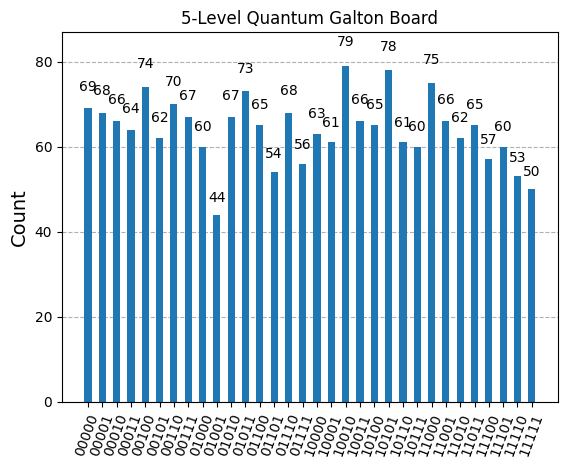

{'11101': 60, '00001': 68, '10000': 63, '01010': 67, '00010': 66, '01011': 73, '01000': 60, '10001': 61, '00111': 67, '01101': 54, '10110': 61, '10111': 60, '00000': 69, '11010': 62, '11100': 57, '11001': 66, '01111': 56, '01100': 65, '00101': 62, '00011': 64, '10100': 65, '10010': 79, '00100': 74, '11111': 50, '11110': 53, '01001': 44, '11011': 65, '00110': 70, '01110': 68, '11000': 75, '10101': 78, '10011': 66}


In [81]:
%matplotlib inline

from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def generate_galton_board(levels: int):
    qc = QuantumCircuit(levels, levels)
    
    # Apply Hadamard to each qubit to simulate random walk
    for i in range(levels):
        qc.h(i)
    
    # Barrier for clarity (not necessary)
    qc.barrier()
    
    # Measure all qubits
    qc.measure(range(levels), range(levels))
    
    return qc

def run_simulation(levels: int = 5, shots: int = 2048):
    qc = generate_galton_board(levels)
    backend = Aer.get_backend('aer_simulator')
    
    # Transpile and set to run as if on real hardware
    tqc = transpile(qc, backend)
    tqc = backend.run(tqc, shots=shots)
    
    result = tqc.result()
    counts = result.get_counts()
    
    # Plot and show histogram
    plot_histogram(counts, title=f"{levels}-Level Quantum Galton Board")
    plt.show()
    
    return counts

# Run the simulation
counts = run_simulation(levels=5, shots=2048)
print(counts)


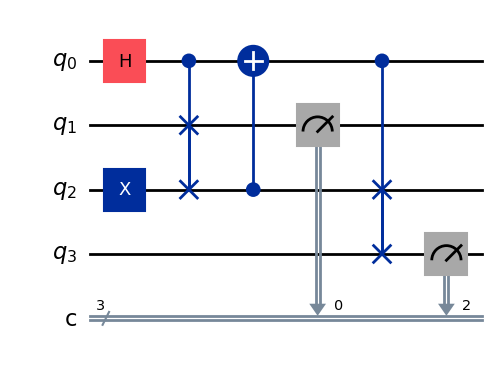

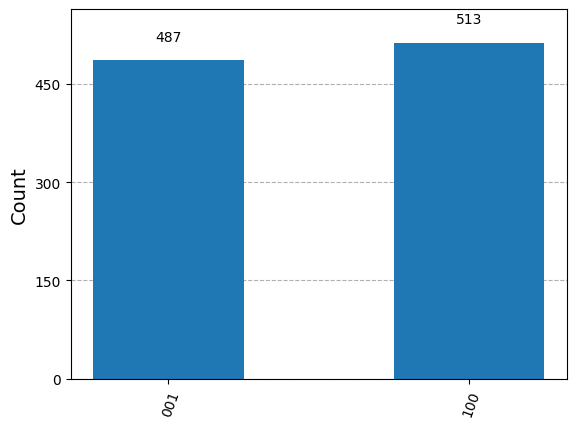

In [82]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import CSwapGate
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# 1 coin qubit + 3 position qubits, 3 classical bits
qc = QuantumCircuit(4, 3)  # q[0]=coin, q[1:4]=positions


qc.x(2)
qc.h(0)


qc.append(CSwapGate(), [0, 1, 2])
qc.cx(2, 0)
qc.append(CSwapGate(), [0, 2, 3])


qc.measure(1, 0)
qc.measure(3, 2)

# Show circuit diagram
qc.draw('mpl')
plt.show()

# Simulate
sim = AerSimulator()
compiled = transpile(qc, sim)  # Correct usage
result = sim.run(compiled, shots=1000).result()
counts = result.get_counts()
# Show result
plot_histogram(counts)
plt.show()


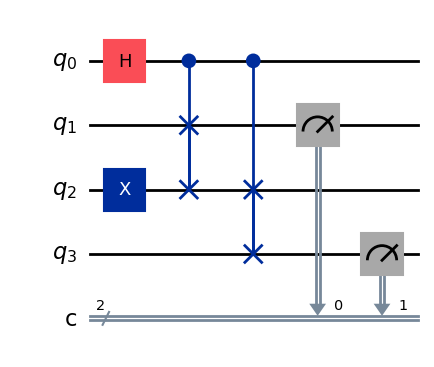

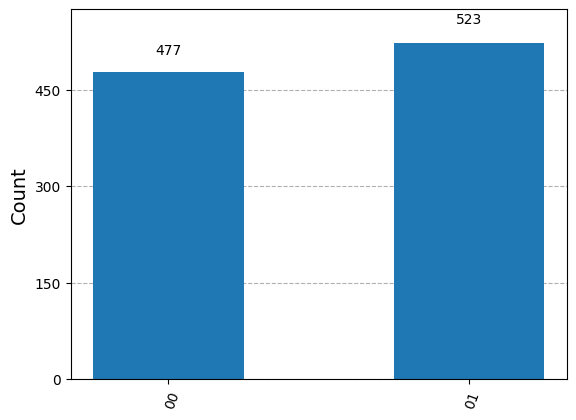

In [83]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import CSwapGate
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# 1 coin + 3 position qubits (total 4 qubits), 2 classical bits
qc = QuantumCircuit(4, 2)  # q[0]=coin, q[1:4]=positions

qc.x(2)      # Start with particle at middle (q[2])
qc.h(0)      # Coin flip

# Controlled swaps
qc.append(CSwapGate(), [0, 1, 2])  # coin=0 → move left
qc.append(CSwapGate(), [0, 2, 3])  # coin=1 → move right

# Measure only the position qubits (q[1] and q[3])
qc.measure(1, 0)  # Left detector
qc.measure(3, 1)  # Right detector

qc.draw('mpl')
plt.show()

# Simulate
sim = AerSimulator()
compiled = transpile(qc, sim)  # Correct usage
result = sim.run(compiled, shots=1000).result()
counts = result.get_counts()
# Show result
plot_histogram(counts)
plt.show()
